# House Prices - Advanced Regression Techniques
## Predict sales prices and practice feature engineering, RFs, and gradient boosting
This project is from [Kaggle]("https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview").

### Practice Skills
- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score

%matplotlib inline

### Explore Data Analysis (EDA)

In [2]:
df_train = pd.read_csv("train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/labber/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

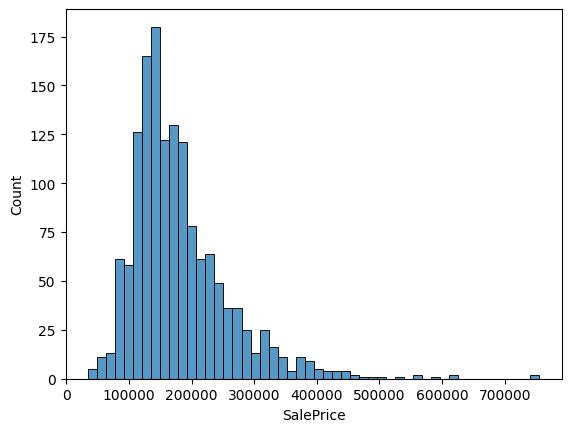

In [4]:
# check how the saleprice distribute
sns.histplot(df_train.SalePrice, bins=50)

### Data cleaning

In [5]:
df_train.columns = df_train.columns.str.lower()
df_train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [6]:
# translate mssubclass column to actual names
mssubclass_values = {
    20:	"1-STORY 1946 & NEWER ALL STYLES",
    30:	"1-STORY 1945 & OLDER",
    40: "1-STORY W/FINISHED ATTIC ALL AGES",
    45:	"1-1/2 STORY - UNFINISHED ALL AGES",
    50: "1-1/2 STORY FINISHED ALL AGES",
    60:	"2-STORY 1946 & NEWER",
    70:	"2-STORY 1945 & OLDER",
    75:	"2-1/2 STORY ALL AGES",
    80:	"SPLIT OR MULTI-LEVEL",
    85:	"SPLIT FOYER",
    90:	"DUPLEX - ALL STYLES AND AGES",
    120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
    150: "1-1/2 STORY PUD - ALL AGES",
    160: "2-STORY PUD - 1946 & NEWER",
    180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
    190: "2 FAMILY CONVERSION - ALL STYLES AND AGES",
}

df_train.mssubclass = df_train.mssubclass.map(mssubclass_values)
df_train.head(2)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
# translate OverallQual, OverallCond column to actual names
overallqual_values = {
       10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallqual = df_train.overallqual.map(overallqual_values)

overallcond_values = {
      10:	"Very Excellent",
       9:	"Excellent",
       8:	"Very Good",
       7:	"Good",
       6:	"Above Average",
       5:	"Average",
       4:	"Below Average",
       3:	"Fair",
       2:	"Poor",
       1:	"Very Poor",
}
df_train.overallcond = df_train.overallcond.map(overallcond_values)
df_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
for c in list(df_train.dtypes[df_train.dtypes == "object"].index):
    df_train[c] = df_train[c].str.replace(" ", "_").str.lower()

df_train.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500


In [9]:
# check the numerical columns
df_train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,1460.0,730.0,422.0,1.0,366.0,730.0,1095.0,1460.0
lotfrontage,1201.0,70.0,24.0,21.0,59.0,69.0,80.0,313.0
lotarea,1460.0,10517.0,9981.0,1300.0,7554.0,9478.0,11602.0,215245.0
yearbuilt,1460.0,1971.0,30.0,1872.0,1954.0,1973.0,2000.0,2010.0
yearremodadd,1460.0,1985.0,21.0,1950.0,1967.0,1994.0,2004.0,2010.0
masvnrarea,1452.0,104.0,181.0,0.0,0.0,0.0,166.0,1600.0
bsmtfinsf1,1460.0,444.0,456.0,0.0,0.0,384.0,712.0,5644.0
bsmtfinsf2,1460.0,47.0,161.0,0.0,0.0,0.0,0.0,1474.0
bsmtunfsf,1460.0,567.0,442.0,0.0,223.0,478.0,808.0,2336.0
totalbsmtsf,1460.0,1057.0,439.0,0.0,796.0,992.0,1298.0,6110.0


In [10]:
# dont need the id
df_train = df_train[list(df_train.columns)[1:]]
df_train

,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,2-story_1946_&_newer,rl,65.0,8450,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,1-story_1946_&_newer_all_styles,rl,80.0,9600,pave,NaN,reg,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,2-story_1946_&_newer,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,2-story_1945_&_older,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,corner,...,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,2-story_1946_&_newer,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,fr2,...,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2-story_1946_&_newer,rl,62.0,7917,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,8,2007,wd,normal,175000
1456,1-story_1946_&_newer_all_styles,rl,85.0,13175,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,mnprv,NaN,0,2,2010,wd,normal,210000
1457,2-story_1945_&_older,rl,66.0,9042,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,gdprv,shed,2500,5,2010,wd,normal,266500
1458,1-story_1946_&_newer_all_styles,rl,68.0,9717,pave,NaN,reg,lvl,allpub,inside,...,0,NaN,NaN,NaN,0,4,2010,wd,normal,142125


In [11]:
# split the train dataset
from sklearn.model_selection import train_test_split
df_train_full, df_train_test = train_test_split(df_train, test_size=0.2, random_state=11)
df_train_train, df_train_val = train_test_split(df_train_full, test_size=0.25,random_state=11)

y_train = np.log1p(df_train_train.saleprice.values)
y_val = np.log1p(df_train_val.saleprice.values)
y_test = np.log1p(df_train_test.saleprice.values)

In [12]:
df_train_train = df_train_train.reset_index(drop=True)
df_train_val = df_train_val.reset_index(drop=True)
df_train_test = df_train_test.reset_index(drop=True)

In [13]:
# delete target value
del df_train_train["saleprice"]
del df_train_val["saleprice"]
del df_train_test["saleprice"]

In [14]:
# fill nan with 0
df_train_train = df_train_train.fillna(0)
df_train_val = df_train_val.fillna(0)

In [15]:
# change the dataframe to dictionary
dict_train = df_train_train.to_dict(orient="records")
dict_val = df_train_val.to_dict(orient="records")

In [16]:
# feature matrix
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

### Decision tree model

In [17]:
# train a decision tree model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# compare rmse in train data
y_pred = dt.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"rmse: {rmse}")

rmse: 0.0


In [19]:
# compare rmse in val data
y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"rmse: {rmse}")

rmse: 0.221833244400802


In [20]:
# model is overfitting because rmse in training is 0
# let us tune the max_depth
max_depth = [1, 10, 20, 30, 40, 50, 60, 70, None]
rmse_list = []
for d in max_depth:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_list.append(rmse)
    print(f"max_depth:{d} --> rmse: {round(rmse,3)}")

max_depth:1 --> rmse: 0.324
max_depth:10 --> rmse: 0.229
max_depth:20 --> rmse: 0.218
max_depth:30 --> rmse: 0.209
max_depth:40 --> rmse: 0.219
max_depth:50 --> rmse: 0.218
max_depth:60 --> rmse: 0.214
max_depth:70 --> rmse: 0.229
max_depth:None --> rmse: 0.215


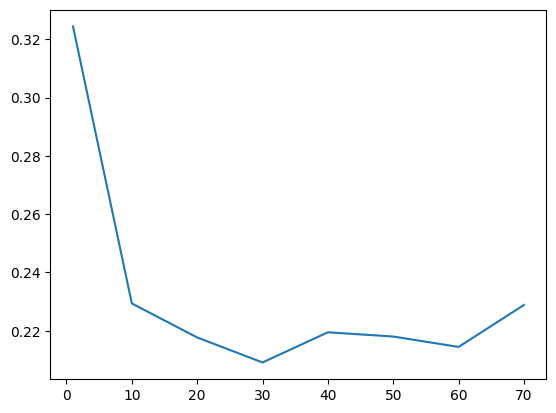

In [21]:
# plot rmse
plt.plot(max_depth, rmse_list)
plt.show()

In [22]:
# train with max_depth 10
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(f"train rmse: {rmse}")

y_pred = dt.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"val rmse: {rmse}")

train rmse: 0.048755409858924285
val rmse: 0.21748850216665228


In [23]:
# tuning min_saples_leaf
scores = []
for d in [10, 20, 40, 70]:
    for s in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeRegressor(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        scores.append((d, s, rmse))


In [24]:
columns = ["max_depth", "min_samples_leaf", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

In [25]:
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["rmse"])
df_scores_pivot.round(3)

rmse                     
max_depth            10     20     40     70
min_samples_leaf                            
1                 0.217  0.223  0.231  0.228
5                 0.212  0.212  0.212  0.212
10                0.218  0.218  0.218  0.218
15                0.220  0.220  0.220  0.220
20                0.224  0.224  0.224  0.224
100               0.255  0.255  0.255  0.255
200               0.300  0.300  0.300  0.300
500               0.418  0.418  0.418  0.418

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

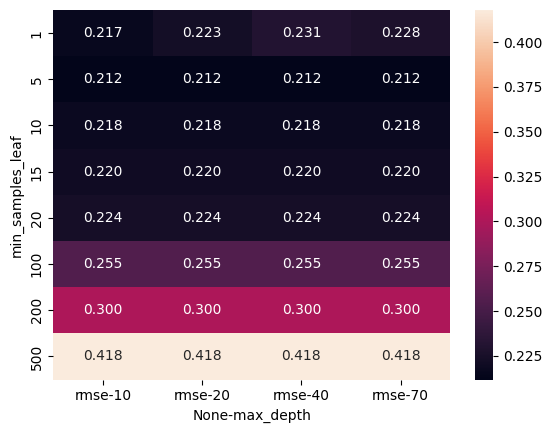

In [26]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [27]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"rmse: {rmse}")

rmse: 0.21180698590178815


In [28]:
# features to split the model
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- yearbuilt <= 1985.50
|   |--- grlivarea <= 1369.00
|   |   |--- centralair=y <= 0.50
|   |   |   |--- 1stflrsf <= 660.50
|   |   |   |   |--- value: [11.01]
|   |   |   |--- 1stflrsf >  660.50
|   |   |   |   |--- grlivarea <= 1060.50
|   |   |   |   |   |--- paveddrive=n <= 0.50
|   |   |   |   |   |   |--- totalbsmtsf <= 792.00
|   |   |   |   |   |   |   |--- value: [11.37]
|   |   |   |   |   |   |--- totalbsmtsf >  792.00
|   |   |   |   |   |   |   |--- value: [11.53]
|   |   |   |   |   |--- paveddrive=n >  0.50
|   |   |   |   |   |   |--- value: [11.17]
|   |   |   |   |--- grlivarea >  1060.50
|   |   |   |   |   |--- value: [11.62]
|   |   |--- centralair=y >  0.50
|   |   |   |--- totalbsmtsf <= 922.00
|   |   |   |   |--- bsmtfinsf1 <= 348.50
|   |   |   |   |   |--- grlivarea <= 1303.00
|   |   |   |   |   |   |--- garagearea <= 228.00
|   |   |   |   |   |   |   |--- totalbsmtsf <= 681.00
|   |   |   |   |   |   |   |   |--- paveddrive=y <= 0.50
|   |   |   |   |   

In [32]:
# feature importances
feature_importances = dt.feature_importances_
feature_names = list(dv.get_feature_names_out())
importances = []

for i, (feature_name, importance) in enumerate(zip(feature_names, feature_importances)):
    importances.append((feature_name, importance))

importances

[('1stflrsf', 0.026128047782495434),
 ('2ndflrsf', 0.00010863243087562541),
 ('3ssnporch', 0.0),
 ('alley', 0.0),
 ('alley=grvl', 0.0),
 ('alley=pave', 0.0),
 ('bedroomabvgr', 0.001467643592558878),
 ('bldgtype=1fam', 0.000764344759123587),
 ('bldgtype=2fmcon', 0.0),
 ('bldgtype=duplex', 0.0),
 ('bldgtype=twnhs', 3.788585125826919e-05),
 ('bldgtype=twnhse', 0.0),
 ('bsmtcond', 0.0),
 ('bsmtcond=fa', 0.0),
 ('bsmtcond=gd', 0.0),
 ('bsmtcond=ta', 0.0),
 ('bsmtexposure', 0.0),
 ('bsmtexposure=av', 0.0),
 ('bsmtexposure=gd', 0.0),
 ('bsmtexposure=mn', 0.0),
 ('bsmtexposure=no', 0.0),
 ('bsmtfinsf1', 0.0298013959954721),
 ('bsmtfinsf2', 0.0),
 ('bsmtfintype1', 0.0),
 ('bsmtfintype1=alq', 0.0),
 ('bsmtfintype1=blq', 0.0),
 ('bsmtfintype1=glq', 0.0),
 ('bsmtfintype1=lwq', 0.0),
 ('bsmtfintype1=rec', 0.0),
 ('bsmtfintype1=unf', 0.0),
 ('bsmtfintype2', 0.0),
 ('bsmtfintype2=alq', 0.0),
 ('bsmtfintype2=blq', 0.0),
 ('bsmtfintype2=glq', 0.0),
 ('bsmtfintype2=lwq', 0.0),
 ('bsmtfintype2=rec', 0.0)

In [33]:
columns = ["feature_name", "feature_importance"]
df_importances = pd.DataFrame(importances, columns=columns)

df_importances

,feature_name,feature_importance
0,1stflrsf,0.026128
1,2ndflrsf,0.000109
2,3ssnporch,0.000000
3,alley,0.000000
4,alley=grvl,0.000000
...,...,...
320,utilities=nosewa,0.000000
321,wooddecksf,0.005886
322,yearbuilt,0.407522
323,yearremodadd,0.006608


In [66]:
# get top 20 features
df_importances_top20 = df_importances.sort_values(by="feature_importance", ascending=False).head(20)
df_importances_top20

,feature_name,feature_importance
322,yearbuilt,0.407522
158,grlivarea,0.201600
133,garagecars,0.107865
46,centralair=y,0.050115
317,totalbsmtsf,0.048593
21,bsmtfinsf1,0.029801
0,1stflrsf,0.026128
190,lotarea,0.020283
202,masvnrarea,0.016460
157,garageyrblt,0.010245


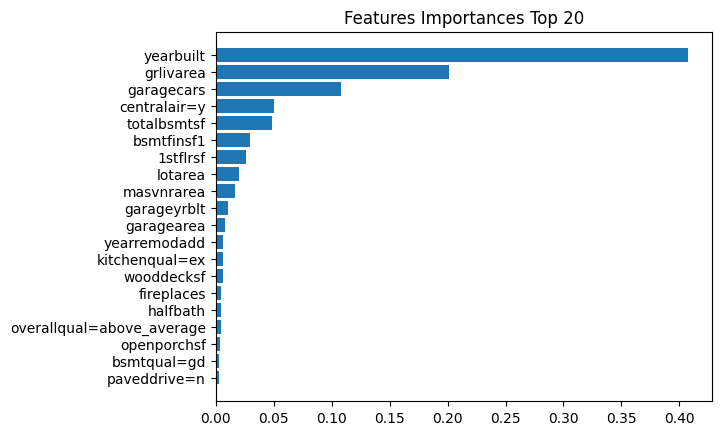

In [68]:
plt.barh(df_importances_top20.feature_name, df_importances_top20.feature_importance)
plt.title("Features Importances Top 20")
plt.gca().invert_yaxis()
plt.show()

### Random forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
#train the model
rmse_list = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    rmse_list.append((n, rmse))

In [31]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["n_estimators", "rmse"])

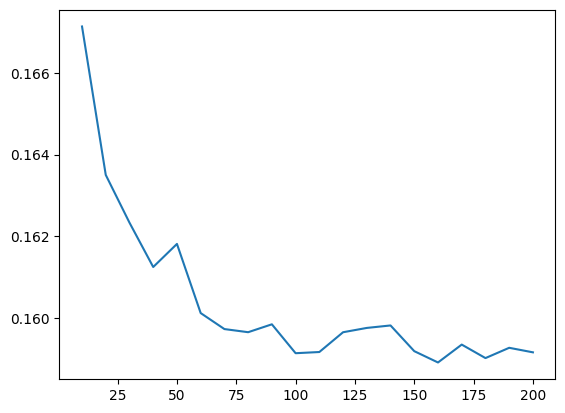

In [32]:
# plot the graph
plt.plot(df_rmse.n_estimators, df_rmse.rmse)

In [33]:
# add in max_depth
rmse_list = []
for d in [20, 30, 40, 50, 60, 70]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=d,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_list.append((d, n, rmse))


In [34]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["max_depth", "n_estimators", "rmse"])

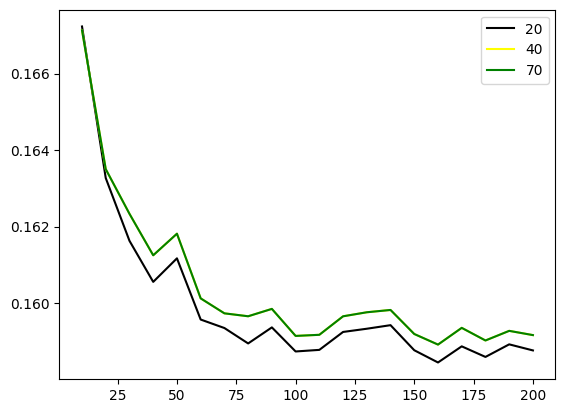

In [35]:
#plot graph
colors = ["black", "yellow", "green"]
depths = [20, 40, 70]
for d, c in zip(depths, colors):
    df_subset = df_rmse[df_rmse.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d, color=c)

plt.legend()


In [36]:
# add min_samples_leaf
rmse_list = []
for s in [1, 5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                   max_depth=20,
                                   min_samples_leaf=s,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        rmse_list.append((s, n, rmse))

In [37]:
# turn to dataframe
df_rmse = pd.DataFrame(rmse_list, columns=["min_samples_leaf", "n_estimators", "rmse"])

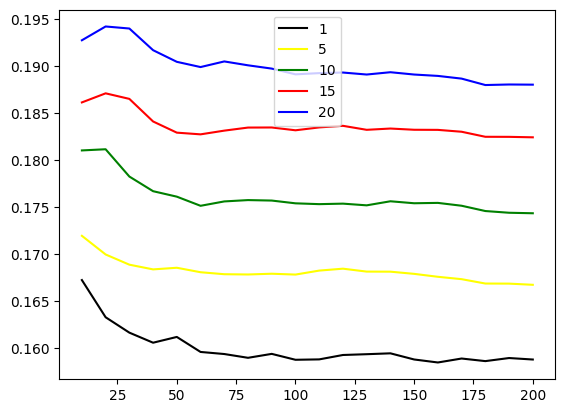

In [38]:
#plot graph
colors = ["black", "yellow", "green", "red", "blue"]
samples = [1, 5, 10, 15, 20]
for s, c in zip(samples, colors):
    df_subset = df_rmse[df_rmse.min_samples_leaf == s]

    plt.plot(df_subset.n_estimators, df_subset.rmse, label=s, color=c)

plt.legend()

In [39]:
# min_samples_leaf = 1, max_depth=20, n_estimators=160
# final RandomForest model
rf = RandomForestRegressor(n_estimators=160,
                           max_depth=20,
                           min_samples_leaf=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=160)

In [40]:
# score improve
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)


0.1581582695918195

### Gradient boosting and XGBoost

In [49]:
import xgboost as xgb

In [50]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [51]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "silent": 1
}

watchlist = [(dtrain, "train"), (dval, "val")]

# train the model
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

In [52]:
print(np.array(output.stdout.split("\n")))

['[0]\ttrain-rmse:0.29785\tval-rmse:0.33550'
 '[10]\ttrain-rmse:0.05404\tval-rmse:0.16637'
 '[20]\ttrain-rmse:0.03507\tval-rmse:0.16036'
 '[30]\ttrain-rmse:0.02722\tval-rmse:0.15877'
 '[40]\ttrain-rmse:0.02011\tval-rmse:0.15805'
 '[50]\ttrain-rmse:0.01554\tval-rmse:0.15780'
 '[60]\ttrain-rmse:0.01245\tval-rmse:0.15773'
 '[70]\ttrain-rmse:0.01013\tval-rmse:0.15767'
 '[80]\ttrain-rmse:0.00804\tval-rmse:0.15790'
 '[90]\ttrain-rmse:0.00615\tval-rmse:0.15803'
 '[99]\ttrain-rmse:0.00523\tval-rmse:0.15795' '']


In [53]:
# create parse xgb result function
def xgb_output(output):
    results = []
    for line in output.stdout.strip().split("\n"):
        it_line, train_line, val_line = line.split("\t")

        it = int(it_line.strip("[]"))
        train = float(train_line.split(":")[1])
        val = float(val_line.split(":")[1])
        results.append((it, train, val))

    columns = ["number_iter", "train_rmse", "val_rmse"]
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

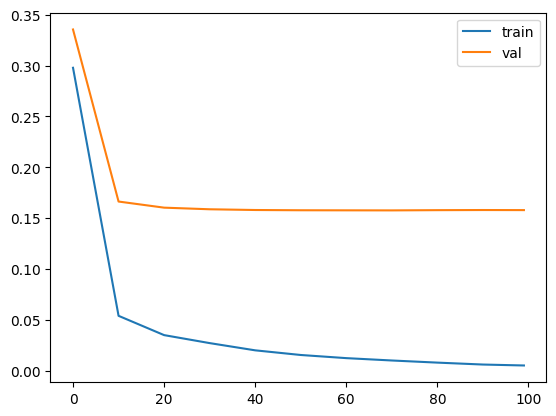

In [54]:
# plot xgb result
df_score = xgb_output(output)
plt.plot(df_score.number_iter, df_score.train_rmse, label="train")
plt.plot(df_score.number_iter, df_score.val_rmse, label="val")
plt.legend()

### xgb parameter tuning

In [58]:
# more programing method to capture the output
from IPython.utils.capture import capture_output
import sys

scores = {}

for eta in [0.01, 0.1, 0.3, 0.7]:
    with capture_output(sys.stdout) as output:
        xgb_params = {
            "eta": eta,
            "max_depth": 6,
            "min_child_weight": 1,
            "objective": "reg:squarederror",
            "nthread": 8,
            "seed": 1,
            "silent": 1,
        }
        watchlist = [(dtrain, "train"), (dval, "val")]
        model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)
        scores[f"eta={eta}"] = xgb_output(output)

scores

{'eta=0.01':     number_iter  train_rmse  val_rmse
 0             0     0.39189   0.41492
 1            10     0.36057   0.38736
 2            20     0.33244   0.36273
 3            30     0.30701   0.34107
 4            40     0.28389   0.32177
 5            50     0.26236   0.30332
 6            60     0.24268   0.28657
 7            70     0.22481   0.27160
 8            80     0.20859   0.25866
 9            90     0.19385   0.24740
 10           99     0.18164   0.23839,
 'eta=0.1':     number_iter  train_rmse  val_rmse
 0             0     0.36219   0.38903
 1            10     0.16417   0.22736
 2            20     0.08892   0.18175
 3            30     0.05773   0.16695
 4            40     0.04350   0.16208
 5            50     0.03543   0.15915
 6            60     0.03113   0.15778
 7            70     0.02820   0.15730
 8            80     0.02579   0.15673
 9            90     0.02410   0.15637
 10           99     0.02254   0.15621,
 'eta=0.3':     number_iter  train_rmse

**Below is manually method that need to run each number to capture result**

In [47]:
# scores = {}

In [48]:

# %%capture output

# xgb_params = {
#     "eta": 0.7,
#     "max_depth": 6,
#     "min_child_weight": 1,
#     "objective": "reg:squarederror",
#     "nthread": 8,
#     "seed": 1,
#     "silent": 1,
# }

# watchlist = [(dtrain, "train"), (dval, "val")]
# model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

In [49]:
# repeat eta for 0.01, 0.1, 0.3, 0.7
# scores["eta=0.7"] = xgb_output(output)

**here is the end of the manual method to capture the result**

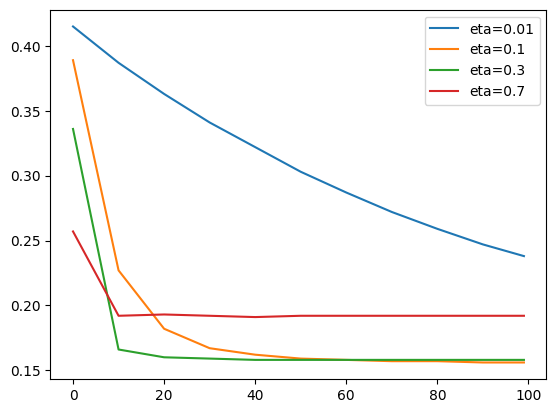

In [59]:
for e in [0.01, 0.1, 0.3, 0.7]:
    plt.plot(scores[f"eta={e}"].number_iter, round(scores[f"eta={e}"].val_rmse, 3), label=f"eta={e}")
    plt.legend()

From the above graph, ```eta=0.3``` is the best.

In [60]:
# tuning max_depth
scores = {}

for d in [1, 6, 10, 15, 20, 30]:
    with capture_output(sys.stdout) as output:
        xgb_params = {
            "eta": 0.3,
            "max_depth": d,
            "min_child_weight": 1,
            "objective": "reg:squarederror",
            "nthread": 8,
            "seed": 1,
            "silent": 1,
        }
        watchlist = [(dtrain, "train"), (dval, "val")]
        model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)
        scores[f"max_depth={d}"] = xgb_output(output)

scores

{'max_depth=1':     number_iter  train_rmse  val_rmse
 0             0     0.35537   0.37626
 1            10     0.20022   0.22782
 2            20     0.16373   0.19840
 3            30     0.14826   0.18153
 4            40     0.13883   0.17296
 5            50     0.13209   0.16719
 6            60     0.12666   0.16495
 7            70     0.12257   0.16259
 8            80     0.11916   0.16156
 9            90     0.11631   0.16061
 10           99     0.11413   0.15940,
 'max_depth=6':     number_iter  train_rmse  val_rmse
 0             0     0.29785   0.33550
 1            10     0.05404   0.16637
 2            20     0.03507   0.16036
 3            30     0.02722   0.15877
 4            40     0.02011   0.15805
 5            50     0.01554   0.15780
 6            60     0.01245   0.15773
 7            70     0.01013   0.15767
 8            80     0.00804   0.15790
 9            90     0.00615   0.15803
 10           99     0.00523   0.15795,
 'max_depth=10':     number_iter

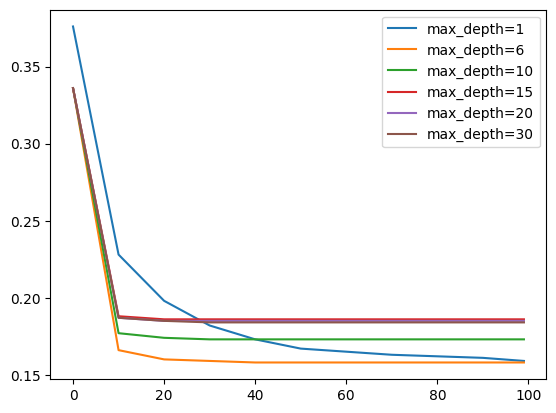

In [61]:
for d in [1, 6, 10, 15, 20, 30]:
    plt.plot(scores[f"max_depth={d}"].number_iter, round(scores[f"max_depth={d}"].val_rmse, 3), label=f"max_depth={d}")
    plt.legend()

From the above graph, ```max_depth=6``` is the best.

In [63]:
# tuning min_child_weight
scores = {}

for w in [1, 5, 10, 15, 20, 30]:
    with capture_output(sys.stdout) as output:
        xgb_params = {
            "eta": 0.3,
            "max_depth": 6,
            "min_child_weight": w,
            "objective": "reg:squarederror",
            "nthread": 8,
            "seed": 1,
            "silent": 1,
        }
        watchlist = [(dtrain, "train"), (dval, "val")]
        model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)
        scores[f"min_child_weight={w}"] = xgb_output(output)

scores

{'min_child_weight=1':     number_iter  train_rmse  val_rmse
 0             0     0.29785   0.33550
 1            10     0.05404   0.16637
 2            20     0.03507   0.16036
 3            30     0.02722   0.15877
 4            40     0.02011   0.15805
 5            50     0.01554   0.15780
 6            60     0.01245   0.15773
 7            70     0.01013   0.15767
 8            80     0.00804   0.15790
 9            90     0.00615   0.15803
 10           99     0.00523   0.15795,
 'min_child_weight=5':     number_iter  train_rmse  val_rmse
 0             0     0.29908   0.33285
 1            10     0.06196   0.16808
 2            20     0.04320   0.15837
 3            30     0.03312   0.15678
 4            40     0.02651   0.15597
 5            50     0.01962   0.15564
 6            60     0.01490   0.15544
 7            70     0.01133   0.15559
 8            80     0.00885   0.15565
 9            90     0.00657   0.15561
 10           99     0.00552   0.15561,
 'min_child_weight

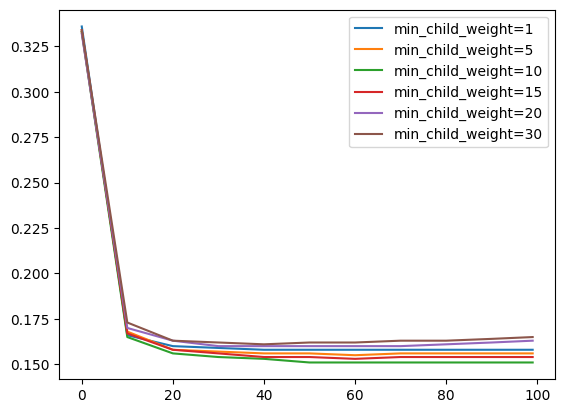

In [64]:
for w in [1, 5, 10, 15, 20, 30]:
    plt.plot(scores[f"min_child_weight={w}"].number_iter, round(scores[f"min_child_weight={w}"].val_rmse, 3), label=f"min_child_weight={w}")
    plt.legend()

From the above graph, ```min_child_weight=10``` is the best.

results: 
```eta = 0.3```,
```max_depth = 6```, 
```min_child_weight = 10```

### Choose the final model

In [ ]:
# decision tree model
dt = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

0.21179967026657043

In [ ]:
# randomforest model
rf = RandomForestRegressor(n_estimators=160,
                           max_depth=20,
                           min_samples_leaf=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

0.15810293899655906

In [ ]:

%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 10,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "silent": 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [ ]:
y_pred = model.predict(dval)
mean_squared_error(y_val, y_pred, squared=False)

0.15110013274215164

### XGBoot model is the winner
Train the model with the full train dataset, and test it

In [16]:
# process full train dataset and test
y_train_full = np.log1p(df_train_full.saleprice.values)
df_train_full = df_train_full.reset_index(drop=True)
del df_train_full["saleprice"]
df_train_full = df_train_full.fillna(0)
df_train_test = df_train_test.fillna(0)


In [17]:
# encode categorical variable
dict_train_full = df_train_full.to_dict(orient="records")
dict_train_test = df_train_test.to_dict(orient="records")

In [18]:
# feature matrix
dv = DictVectorizer(sparse=True)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_train_test)

In [20]:
# xgb
import xgboost as xgb

dfulltrain = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.get_feature_names_out().tolist())
dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out().tolist())

In [21]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 10,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "silent": 1
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=100)

In [22]:
y_pred = model.predict(dtest)
mean_squared_error(y_test, y_pred, squared=False)

0.1505004338095706

I am quite satisfied with the result.

### Save the model

In [23]:
import pickle

In [24]:
output_file = "model.bin"

In [25]:
with open(output_file, "wb") as f_out:
    pickle.dump((dv, model), f_out)


### Load the model

In [13]:
import pickle
import xgboost as xgb
import numpy as np

In [2]:
model_file = "model.bin"

In [3]:
with open(model_file, "rb") as f_in:
    dv, model = pickle.load(f_in)

In [4]:
dv, model

(DictVectorizer(), <xgboost.core.Booster at 0x7f38e6682650>)

In [5]:
house1 = {
        "mssubclass": 60,
        "mszoning": "RL",
        "lotfrontage": 65,
        "lotarea": 8450,
        "street": "pave",
        "alley": "na",
        "lotshape": "reg",
        "landcontour": "lvl",
        "utilities": "allpub",
        "lotconfig": "inside",
        "landslope": "gtl",
        "neighborhood": "collgcr",
        "condition1": "norm",
        "condition2": "norm",
        "bldgtype": "1fam",
        "housestyle": "2story",
        "overallqual": 7,
        "overallcond": 5,
        "yearbuilt": 2003,
        "yearremodadd": 2003,
        "roofstyle": "gable",
        "roofmatl": "compshg",
        "exterior1st": "vinylsd",
        "exterior2nd": "vinylsd",
        "masvnrtype": "brkface",
        "masvnrarea": 196,
        "exterqual": "gd",
        "extercond": "ta",
        "foundation": "pconc",
        "bsmtqual": "gd",
        "bsmtcond": "ta",
        "bsmtexposure": "no",
        "bsmtfintype1": "glq",
        "bsmtfinsf1": 706,
        "bsmtfintype2": "unf",
        "bsmtfinsf2": 0,
        "bsmtunfsf": 150,
        "totalbsmtsf": 856,
        "heating": "gasa",
        "heatingqc": "ex",
        "centralair": "y",
        "electrical": "sbrkr",
        "1stflrsf": 856,
        "2ndflrsf": 854,
        "lowqualfinsf": 0,
        "grlivarea": 1710,
        "bsmtfullbath": 1,
        "bsmthalfbath": 0,
        "fullbath": 2,
        "halfbath": 1,
        "bedroomabvgr": 3,
        "kitchenabvgr": 1,
        "kitchenqual": "gd",
        "totrmsabvgrd": 8,
        "functional": "typ",
        "fireplaces": 0,
        "fireplacequ": "na",
        "garagetype": "attchd",
        "garageyrblt": 2003,
        "garagefinish": "rfn",
        "garagecars": 2,
        "garagearea": 548,
        "garagequal": "ta",
        "garagecond": "ta",
        "paveddrive": "y",
        "wooddecksf": 0,
        "openporchsf": 61,
        "enclosedporch": 0,
        "3ssnporch": 0,
        "screenporch": 0,
        "poolarea": 0,
        "poolqc": "na",
        "fence": "na",
        "miscfeature": "na",
        "miscval": 0,
        "mosold": 2,
        "yrsold": 2008,
        "saletype": "wd",
        "salecondition": "normal"
}

In [7]:
X = dv.transform([house1])

In [11]:
dx = xgb.DMatrix(X, feature_names=dv.get_feature_names_out().tolist())

In [15]:
prediction = model.predict(dx)
prediction

array([12.228928], dtype=float32)

In [16]:
# convert to regular price
np.expm1(prediction)

array([204622.62], dtype=float32)

The model is working well.